# Predicting Coupon Redemption

XYZ Credit Card company regularly helps its merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning.

Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

ABC promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

The data available in this problem contains the following inform

# Importing all the necessary libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')


# Load data file (Train DataFrame)

Train data containing the coupons offered to the given customers under the 18 campaigns

id- Unique id for coupon customer impression

campaign_id - Unique id for a discount campaign

coupon_id - id for a discount coupon

customer_id -Unique id for a customer

redemption_status- (target) (0 - Coupon not redeemed, 1 - Coupon redeemed) 

In [2]:
train = pd.read_csv('train.csv')


In [3]:
train[train.isnull().any(axis=1)].count()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

# INFERENCES::no null values are found


In [4]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [5]:
train.tail()

,id,campaign_id,coupon_id,customer_id,redemption_status
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0
78368,128595,13,681,623,0


In [6]:
train.size

391845

In [7]:
train.shape

(78369, 5)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [9]:
train.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [10]:
train.dtypes

id                   int64
campaign_id          int64
coupon_id            int64
customer_id          int64
redemption_status    int64
dtype: object

# No need to convert anything every datatype is of int64 type.


In [11]:
train["redemption_status"].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [12]:
train.redemption_status.value_counts(normalize=True)*100

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64

Text(0.5, 1.0, 'Value Counts')

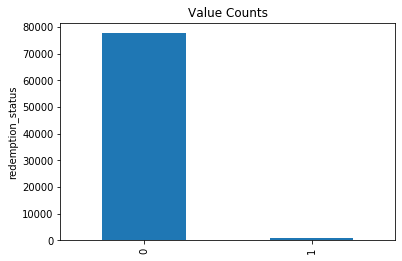

In [13]:
train['redemption_status'].value_counts().plot(kind='bar')
plt.ylabel('redemption_status')
plt.title("Value Counts")

In [14]:
#The data is highly imbalanced data.

In [15]:
IMBALANCE_percentage = ((729)/(78369))*100
print('perentage of IMBALANCE: ',IMBALANCE_percentage)

perentage of IMBALANCE:  0.930214753282548


# Campaign Dataframe

-The main purpose of campaign is to attract more people and tell them about the benifits of coupon and to increase the redemtion_status of coupons.

 Campaign information for each of the 28 campaigns

campaign_id -Unique id for a discount campaign

campaign_type -Anonymised Campaign Type (X/Y)

start_date -Campaign Start Date

end_date -Campaign End Date 

# Load the file

In [16]:
campaign = pd.read_csv('campaign_data.csv')

In [17]:
campaign[campaign.isnull().any(axis=1)].count()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

# INFERENCES::no null values are found


In [18]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [19]:
campaign.tail()

,campaign_id,campaign_type,start_date,end_date
23,30,X,19/11/12,04/01/13
24,29,Y,08/10/12,30/11/12
25,28,Y,16/09/12,16/11/12
26,27,Y,25/08/12,27/10/12
27,26,X,12/08/12,21/09/12


In [20]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [21]:
campaign.describe()

,campaign_id
count,28.000000
mean,15.571429
std,9.118271
min,1.000000
25%,7.750000
50%,16.500000
75%,23.250000
max,30.000000


In [22]:
campaign.dtypes

campaign_id       int64
campaign_type    object
start_date       object
end_date         object
dtype: object

# INFERENCES:we should convert every object column into int64 type

-Customers can recieve coupons under various campaigns and may choose to redeem them.

-They can redeem the coupon for any valid product between the campaign start date and end date.

In [23]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

-Out of 28 total campaigns 22 are Y type campaign and 6 are X type campaign

Text(0.5, 1.0, 'Value Counts')

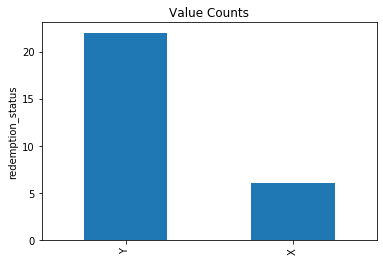

In [24]:
campaign.campaign_type.value_counts().plot(kind='bar')
plt.ylabel('redemption_status')
plt.title("Value Counts")

# Converting the date columns to date time

In [25]:
#Converting the date columns to date time
campaign['start_date'] = pd.to_datetime(campaign['start_date'], format = '%d/%m/%y')
campaign['end_date'] = pd.to_datetime(campaign['end_date'], format = '%d/%m/%y')



# Creating a new column campaign_duration

In [26]:

campaign["campaign_duration"] = campaign["end_date"] - campaign["start_date"]
campaign["campaign_duration"] = campaign["campaign_duration"].apply(lambda x: x.days) 

In [27]:
campaign["campaign_duration"] 

0     60
1     32
2     70
3     38
4     32
5     32
6     55
7     32
8     32
9     32
10    47
11    46
12    32
13    32
14    32
15    48
16    34
17    32
18    56
19    34
20    32
21    37
22    32
23    46
24    53
25    61
26    63
27    40
Name: campaign_duration, dtype: int64

# Label Encoding on Campaign type

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
campaign["campaign_type"] = encoder.fit_transform(campaign.campaign_type)

# Coupons (Dataframe)

# Load the file

In [29]:
coupons = pd.read_csv('coupon_item_mapping.csv')

In [30]:
coupons[coupons.isnull().any(axis=1)].count()

coupon_id    0
item_id      0
dtype: int64

In [31]:
coupons.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


# Items (Dataframe)

Item information for each item sold by the retailer

item_id-Unique id for item

brand -Unique id for item brand

brand_type -Brand Type (local/Established)

category -Item Category 

In [32]:
items = pd.read_csv('item_data.csv')

In [33]:
items[items.isnull().any(axis=1)].count()

item_id       0
brand         0
brand_type    0
category      0
dtype: int64

In [34]:
items.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [35]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


# Brand Type

In [36]:
items.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

Text(0.5, 1.0, 'Value Counts')

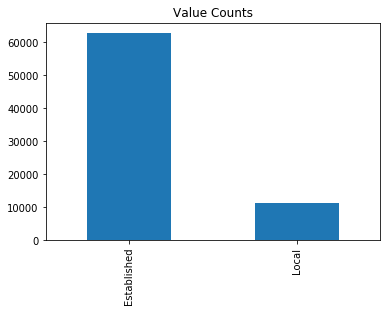

In [37]:
items.brand_type.value_counts().plot(kind='bar')

plt.title("Value Counts")

In [38]:
items.brand_type.value_counts(normalize=True)

Established    0.848459
Local          0.151541
Name: brand_type, dtype: float64

-The type of brand is rarely local most of them are from established.

# Category

In [39]:
categorcial_variables = ["category"]

In [40]:
items.category.value_counts(normalize=True)

Grocery                   0.438096
Pharmaceutical            0.330395
Natural Products          0.034199
Dairy, Juices & Snacks    0.032741
Skin & Hair Care          0.030297
Meat                      0.028083
Packaged Meat             0.026544
Prepared Food             0.025383
Bakery                    0.022669
Seafood                   0.009829
Flowers & Plants          0.008965
Miscellaneous             0.005198
Alcohol                   0.004091
Garden                    0.001377
Restauarant               0.001053
Salads                    0.000540
Travel                    0.000257
Fuel                      0.000189
Vegetables (cut)          0.000095
Name: category, dtype: float64

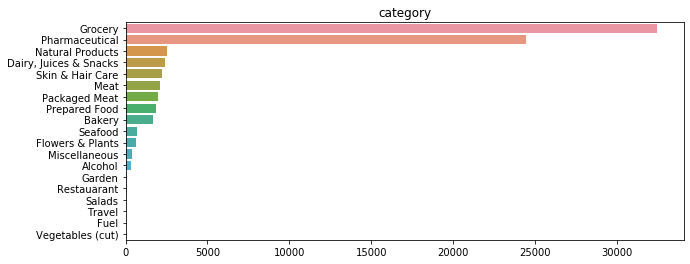

In [41]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(items[col].value_counts().values, items[col].value_counts().index)
    plt.title(col)

-Here we can observe that 43% products are of grocery category and 33% products are pharmaceutical category which comprises the most.

-After the above two categories some top categories are Natural Products,Dairy Juices and Snacks,Skin and Health Care and Meat.

-Very few coupons are there for category of Vegetables,fuels and for travel.


In [42]:
items.brand_type = encoder.fit_transform(items["brand_type"])
items.category = encoder.fit_transform(items["category"])

# Customer Demographic Dataframe

 Customer demographic information for some customers

customer_id -Unique id for a customer

age_range -Age range of customer family in years

marital_status- Married/Single

rented- 0 - not rented accommodation, 1 - rented accommodation

family_size- Number of family members

no_of_children -Number of children in the family

income_bracket- Label Encoded Income Bracket (Higher income corresponds to higher number) 

# Load the file

In [43]:
cust_demo = pd.read_csv('customer_demographics.csv')

In [44]:
cust_demo[cust_demo.isnull().any(axis=1)].count()

customer_id       595
age_range         595
marital_status    266
rented            595
family_size       595
no_of_children     57
income_bracket    595
dtype: int64

-We can see so many null values in cust_demo

In [45]:
cust_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [46]:
cust_demo.tail()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5
759,1581,26-35,NaN,0,3,1,1


In [47]:
cust_demo.describe()

,customer_id,rented,income_bracket
count,760.000000,760.000000,760.000000
mean,779.201316,0.053947,4.715789
std,459.754429,0.226063,2.258817
min,1.000000,0.000000,1.000000
25%,382.750000,0.000000,3.000000
50%,774.500000,0.000000,5.000000
75%,1187.250000,0.000000,6.000000
max,1581.000000,1.000000,12.000000


In [48]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [49]:
cust_demo.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [50]:
cust_demo.columns

Index(['customer_id', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')

# Marital Status

In [51]:
cust_demo.marital_status.value_counts()

Married    317
Single     114
Name: marital_status, dtype: int64

-Most of the people are married in our dataset

In [52]:
cust_demo["marital_status"].value_counts(normalize=True)

Married    0.735499
Single     0.264501
Name: marital_status, dtype: float64

-About 73% people are married rest are single.

Text(0.5, 1.0, 'Value Counts')

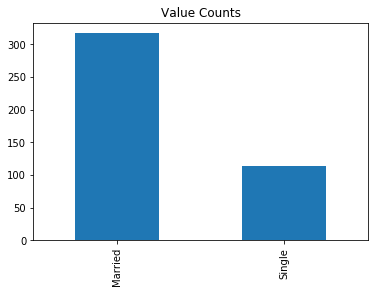

In [53]:
cust_demo["marital_status"].value_counts().plot(kind='bar')

plt.title("Value Counts")

In [54]:
cust_demo["marital_status"].isnull().sum()

329

In [55]:
import re
cust_demo['family_size'] = cust_demo.family_size.apply(lambda x: int(re.sub('\+','',x)))

In [56]:

cust_demo['no_of_children'] = cust_demo.no_of_children.apply(lambda x: int(re.sub('\+','',x)) if pd.notna(x) else x)

# Customers who have family size of 1 means they are single

In [57]:

cust_demo.loc[pd.isnull(cust_demo.marital_status) & (cust_demo.family_size == 1),'marital_status'] = 'Single'

In [58]:
cust_demo["marital_status"].isnull().sum()

146

 # Customers who has a family size where no of childrens == 1, will also be single so impute marital_status for them also to be single.

In [59]:


cust_demo.loc[(cust_demo.family_size - cust_demo.no_of_children == 1) & pd.isnull(cust_demo.marital_status),'marital_status'] = 'Single'

In [60]:
cust_demo["marital_status"].isnull().sum()

133

In [61]:
cust_demo.loc[(pd.isnull(cust_demo.marital_status)) & ((cust_demo.family_size - cust_demo.no_of_children) == 2)  
              & (pd.notnull(cust_demo.no_of_children)),'marital_status'] = 'Married'

cust_demo.loc[pd.isnull(cust_demo.marital_status) & (pd.isnull(cust_demo.no_of_children)) 
              & (cust_demo.family_size ==2),'marital_status'] = 'Married'


In [62]:
cust_demo["marital_status"].isnull().sum()

0

# Family Size

In [63]:
cust_demo.family_size.value_counts()

2    303
1    248
3    104
5     57
4     48
Name: family_size, dtype: int64

In [64]:
cust_demo.family_size.value_counts(normalize=True)

2    0.398684
1    0.326316
3    0.136842
5    0.075000
4    0.063158
Name: family_size, dtype: float64

-About 39% of people have family size of 2

-About 32% are single

-Very rare people have family size of 4 or more

# Remove +5 and  making it as 5 and then convert the column to int type



In [65]:
categorcial_variables = ['family_size']

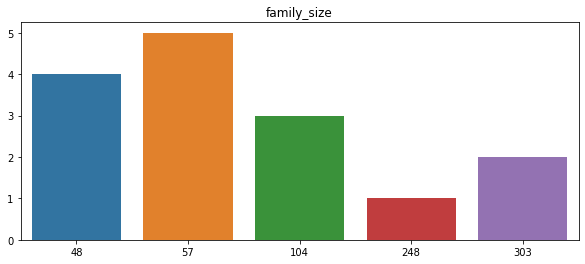

In [66]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(cust_demo[col].value_counts().values, cust_demo[col].value_counts().index)
    plt.title(col)

# No of children

In [67]:
cust_demo.no_of_children.value_counts()

1.0    107
3.0     60
2.0     55
Name: no_of_children, dtype: int64

In [68]:
cust_demo.no_of_children.value_counts(normalize=True)

1.0    0.481982
3.0    0.270270
2.0    0.247748
Name: no_of_children, dtype: float64

-About 48% people have one kid 

-About 24% of people have two kids

-27% of people  have 3 or more kids

In [69]:
categorcial_variables = ['no_of_children']

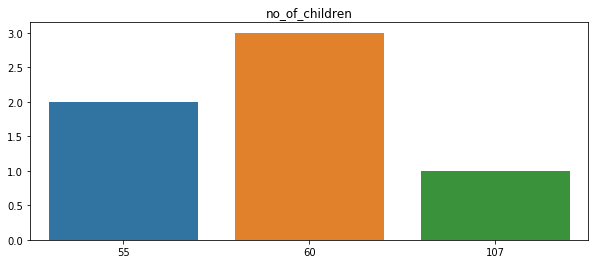

In [70]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(cust_demo[col].value_counts().values, cust_demo[col].value_counts().index)
    plt.title(col)

In [71]:
cust_demo.no_of_children.isnull().sum()

538

# People where family_size is 2 will have 0 childrens.

In [72]:

cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.marital_status == 'Married') & (cust_demo.family_size == 2),'no_of_children'] = 0

# Single where family size is 2, will have 1 child

In [73]:

cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.family_size == 2),'no_of_children'] = 1

# Customers where family size is 1 will have no children.

In [74]:

cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.family_size == 1), 'no_of_children'] = 0

In [75]:
cust_demo.no_of_children.isnull().sum()

0

-No Nan values found in No of children now

In [76]:

cust_demo['no_of_children']=cust_demo['no_of_children'].astype(np.int64)

In [77]:
#Applying Label ENCODER
cust_demo["marital_status"] = encoder.fit_transform(cust_demo["marital_status"])

# Age range 

In [78]:
cust_demo.age_range.value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [79]:
cust_demo.age_range.value_counts(normalize=True)

46-55    0.356579
36-45    0.246053
26-35    0.171053
70+      0.089474
56-70    0.077632
18-25    0.059211
Name: age_range, dtype: float64

-Most of the people ie 35% of people are in between age of 46-55

-Very less people ie 0.05% of people are in age of between 18-25

In [80]:
categorcial_variables = ['age_range']

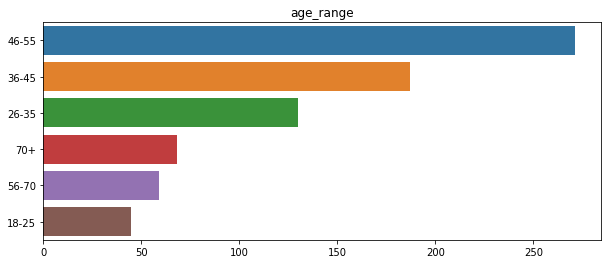

In [81]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(cust_demo[col].value_counts().values, cust_demo[col].value_counts().index)
    plt.title(col)

# Applying Label Encoding for age_range 

18-25 is 0

26-35 is 1

36-45 is 2

46-55 is 3

56-70  4 

70+ is 5


In [82]:
cust_demo["age_range"] = encoder.fit_transform(cust_demo["age_range"])

# Income Bracket

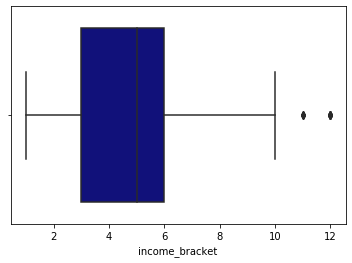

In [83]:
sns.boxplot(cust_demo['income_bracket'],color='darkblue')
plt.show()

In [84]:
cust_demo["income_bracket"].describe()

count    760.000000
mean       4.715789
std        2.258817
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       12.000000
Name: income_bracket, dtype: float64

-The median of income bracket is 5

# Customer transaction data

Transaction data for all customers for duration of campaigns in the train data.

Date -Date of Transaction

Customer_id-Unique id for a customer

item_id- Unique id for item

quantity- quantity of item bought

selling_price- Sales value of the transaction

other_discount- Discount from other sources such as manufacturer coupon/loyalty card

coupon_discount- Discount availed from retailer coupon 


# Load the file

In [85]:
cust_trans = pd.read_csv('customer_transaction_data.csv') 

In [86]:
cust_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [87]:
cust_trans.tail()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0
1324565,2013-06-30,1129,64498,2,489.78,0.00,0.0


In [88]:
cust_trans.shape

(1324566, 7)

In [89]:
cust_trans.dtypes

date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_discount    float64
dtype: object

In [90]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


# Selling Price

In [91]:
cust_trans["selling_price"].describe()

count    1.324566e+06
mean     1.146036e+02
std      1.529053e+02
min      3.600000e-01
25%      4.916000e+01
50%      7.801000e+01
75%      1.243100e+02
max      1.780964e+04
Name: selling_price, dtype: float64

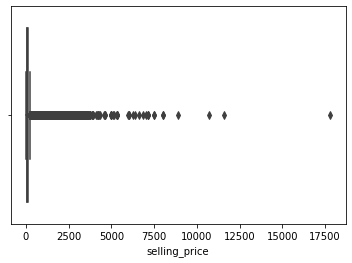

In [92]:

sns.boxplot(cust_trans["selling_price"])
plt.show()

-Here we can see the Median>Mean its the case of low outliers and data is skewed towards left

# Other discount

In [93]:
cust_trans["other_discount"].describe()

count    1.324566e+06
mean    -1.776871e+01
std      3.788867e+01
min     -3.120310e+03
25%     -2.315000e+01
50%     -1.780000e+00
75%      0.000000e+00
max      0.000000e+00
Name: other_discount, dtype: float64

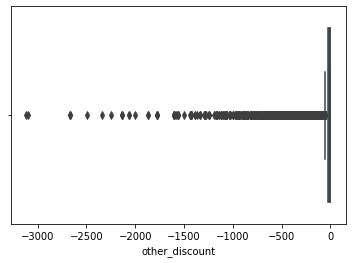

In [94]:

sns.boxplot(cust_trans["other_discount"])
plt.show()

# Converting the date column into date time

In [95]:
cust_trans['date'] = pd.to_datetime(cust_trans['date'])

In [96]:
cust_trans = cust_trans.sort_values('date').reset_index(drop=True)

# Creating 3 columns of Day,Weekday and Month

In [97]:

cust_trans['day'] = cust_trans["date"].apply(lambda x: x.day)
cust_trans['weekday'] = cust_trans["date"].apply(lambda x: x.weekday())
cust_trans['month'] = cust_trans["date"].apply(lambda x: x.month)

# Make one more column to check weather coupon was used or not

In [98]:

cust_trans['coupon-used'] = cust_trans.coupon_discount.apply(lambda x: 1 if x !=0 else 0)
cust_trans['coupon-used']

0          0
1          1
2          0
3          0
4          0
          ..
1324561    0
1324562    0
1324563    0
1324564    0
1324565    0
Name: coupon-used, Length: 1324566, dtype: int64

# Test Dataframe

In [99]:
test = pd.read_csv('test.csv')

 Contains the coupon customer combination for which redemption status is to be predicted

id -Unique id for coupon customer impression

campaign_id -unique id for a discount campaign

coupon_id -Unique id for a discount coupon

customer_id- Unique id for a customer 

# coupon_item_mapping

 Mapping of coupon and items valid for discount under that coupon

coupon_id- Unique id for a discount coupon (no order)

item_id- Unique id for items for which given coupon is valid (no order) 


# Now we can Start with Merging the Data Frames

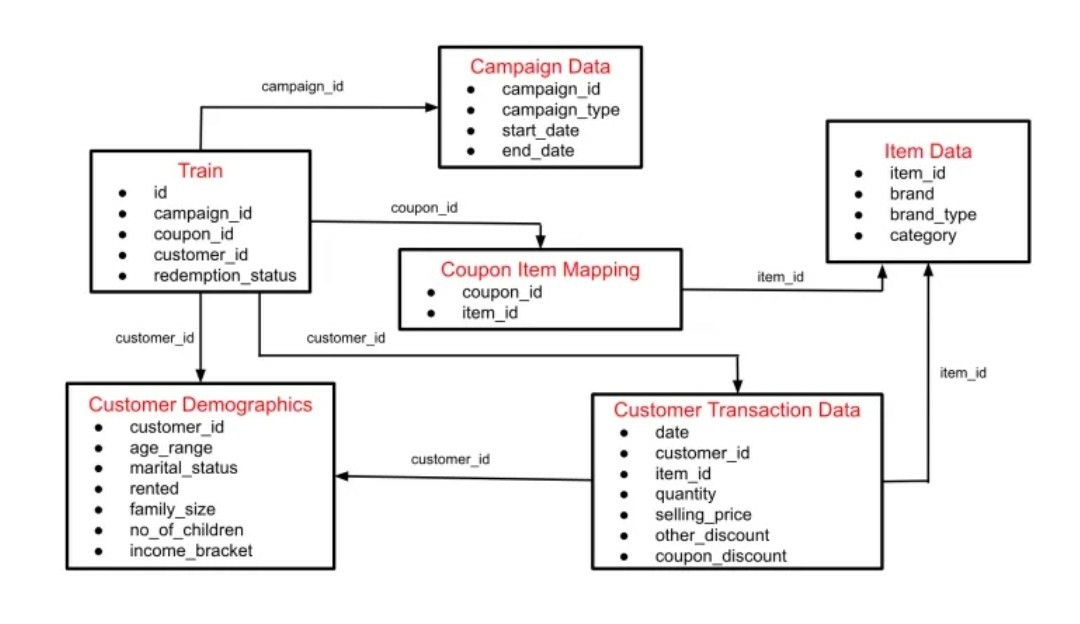

In [100]:
from IPython.display import Image
Image("tables_relationship.jpg")

# Merge coupon item data and items data on item_id

In [101]:

coupons_items = pd.merge(coupons, items, on="item_id", how="left")

In [102]:
coupons_items.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,1,6
1,107,75,56,1,6
2,494,76,209,0,6
3,522,77,278,0,6
4,518,77,278,0,6


# Aggregate the customer transaction by 'item_id'

In [103]:
trans1 = pd.pivot_table(cust_trans, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount','coupon-used'],
               aggfunc={'customer_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon-used': np.sum
                        } )
trans1.reset_index(inplace=True)
trans1.rename(columns={'customer_id': 'no_of_customers'}, inplace=True)

In [104]:
trans2 = pd.pivot_table(cust_trans, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'customer_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum,
                        } )
trans2.reset_index(inplace=True)
trans2.rename(columns={'customer_id': 't_counts', 'quantity':'qu_sum',
                             'selling_price':'price_sum', 'other_discount':'od_sum',
                             'coupon_discount':'cd_sum'}, inplace=True)

In [105]:
trans = pd.merge(trans1, trans2, on='item_id',how='left' )

In [106]:
trans['total_discount_mean'] = trans['coupon_discount'] + trans['other_discount']
trans['total_discount_sum'] = trans['od_sum'] + trans['cd_sum']
trans.head()

,item_id,coupon-used,coupon_discount,no_of_customers,other_discount,quantity,selling_price,cd_sum,t_counts,od_sum,qu_sum,price_sum,total_discount_mean,total_discount_sum
0,1,0,0.0,2,0.0,1.0,124.31,0.0,2,0.0,2,248.62,0.0,0.0
1,2,0,0.0,1,0.0,1.0,35.26,0.0,1,0.0,1,35.26,0.0,0.0
2,3,0,0.0,1,0.0,1.0,56.64,0.0,1,0.0,1,56.64,0.0,0.0
3,4,0,0.0,1,0.0,1.0,54.85,0.0,1,0.0,1,54.85,0.0,0.0
4,5,0,0.0,1,0.0,1.0,81.57,0.0,1,0.0,1,81.57,0.0,0.0


# Merging coupon_items and trans on Item-id

In [107]:
item_coupon_trans = pd.merge(coupons_items, trans, on='item_id', how='left')

# Aggregating item_coupon_trans on 'coupon_id

In [108]:
from scipy.stats import mode
coupon = pd.pivot_table(item_coupon_trans, index ="coupon_id",
                         values=[ 'item_id', 'brand', 'brand_type', 'category',
       'coupon_discount', 'coupon-used', 'no_of_customers', 'other_discount',
       'quantity', 'selling_price', 'cd_sum', 't_counts', 'od_sum', 'qu_sum',
       'price_sum', 'total_discount_mean', 'total_discount_sum'],
              aggfunc={'item_id':lambda x: len(set(x)),
                       'brand':lambda x: mode(x)[0][0],
                       'brand_type':lambda x: mode(x)[0][0],
                       'category':lambda x: mode(x)[0][0],
                       'coupon_discount':np.mean,
                       'no_of_customers':np.mean,
                       'other_discount':np.mean,
                       'quantity':np.mean,
                       'selling_price':np.mean,
                      'coupon-used': np.sum,
                       'cd_sum': np.sum,
                       't_counts': np.sum,
                       'od_sum': np.sum,
                       'qu_sum': np.sum,
                       'price_sum': np.sum,
                       'total_discount_mean': np.mean,
                       'total_discount_sum': np.sum
                      })
coupon.reset_index(inplace=True)

In [109]:
coupon.rename(columns={'item_id':'item_counts'}, inplace=True)

# Aggregating cust_trans on 'coupon_id

In [110]:
trans3 = pd.pivot_table(cust_trans, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount','coupon-used','day','weekday','month'],
               aggfunc={'item_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon-used': np.sum,
                        'day':lambda x: mode(x)[0][0],
                        'weekday':lambda x: mode(x)[0][0],
                        'month':lambda x: mode(x)[0][0]}
              )
trans3.reset_index(inplace=True)
trans3.rename(columns={'item_id': 'no_of_items'}, inplace=True)
trans3.head()

,customer_id,coupon-used,coupon_discount,day,no_of_items,month,other_discount,quantity,selling_price,weekday
0,1,78,-2.019876,3,463,5,-16.250382,1.170802,94.001842,3
1,2,4,-0.595084,13,352,6,-16.830430,1.131265,102.864033,5
2,3,53,-3.091546,16,406,7,-22.714227,11.578723,103.617404,4
3,4,1,-0.404773,14,125,5,-13.305409,1.272727,154.423727,5
4,5,2,-0.114684,11,490,5,-13.657917,117.869949,130.827146,1


In [111]:
trans4 = pd.pivot_table(cust_trans, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'item_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum}
              )
trans4.reset_index(inplace=True)
trans4.rename(columns={'item_id': 'customer_id_count','quantity':'qa_sum','selling_price':'pprice_sum',
                             'other_discount':'odd_sum','coupon_discount':'cdd_sum'  }, inplace=True)
trans4.head()

,customer_id,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,-2116.83,1048,-17030.40,1227,98513.93
1,2,-249.34,419,-7051.95,474,43100.03
2,3,-2179.54,705,-16013.53,8163,73050.27
3,4,-89.05,220,-2927.19,280,33973.22
4,5,-90.83,792,-10817.07,93353,103615.10


In [112]:
trans = pd.merge(trans3, trans4, on='customer_id', how='left')
trans.head()

,customer_id,coupon-used,coupon_discount,day,no_of_items,month,other_discount,quantity,selling_price,weekday,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,78,-2.019876,3,463,5,-16.250382,1.170802,94.001842,3,-2116.83,1048,-17030.40,1227,98513.93
1,2,4,-0.595084,13,352,6,-16.830430,1.131265,102.864033,5,-249.34,419,-7051.95,474,43100.03
2,3,53,-3.091546,16,406,7,-22.714227,11.578723,103.617404,4,-2179.54,705,-16013.53,8163,73050.27
3,4,1,-0.404773,14,125,5,-13.305409,1.272727,154.423727,5,-89.05,220,-2927.19,280,33973.22
4,5,2,-0.114684,11,490,5,-13.657917,117.869949,130.827146,1,-90.83,792,-10817.07,93353,103615.10


In [113]:
def merge_all(df): 
    df=  pd.merge(df, coupon, on="coupon_id", how="left")
    df = pd.merge(df, campaign, on="campaign_id", how="left")
    df = pd.merge(df, cust_demo, on="customer_id", how="left")
    df = pd.merge(df, trans, on='customer_id', how='left')
    return df

In [114]:
train = merge_all(train)
test= merge_all(test)
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,brand,brand_type,category,cd_sum,coupon-used_x,...,month,other_discount_y,quantity_y,selling_price_y,weekday,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,13,27,1053,0,1105,0,6,-5349.93,191.0,...,5,-33.168935,340.487097,184.260484,2,-89.05,310,-10282.37,105551,57120.75
1,2,13,116,48,0,56,1,6,0.00,0.0,...,6,-27.699169,31.540260,234.247013,5,-1237.79,385,-10664.18,12143,90185.10
2,6,9,635,205,0,560,0,11,-605.54,15.0,...,3,-17.795660,1.392784,121.094495,2,-2145.72,970,-17261.79,1351,117461.66
3,7,13,644,1050,0,611,0,6,-17.81,1.0,...,8,-16.655570,1.291139,98.276034,4,-178.10,237,-3947.37,306,23291.42
4,9,8,1017,1489,0,1558,0,6,-569.92,23.0,...,5,-20.524733,247.443060,120.636103,4,-265.01,562,-11534.90,139063,67797.49


In [115]:
train.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
brand                      0
brand_type                 0
category                   0
cd_sum                     0
coupon-used_x              0
coupon_discount_x          0
item_counts                0
no_of_customers            0
od_sum                     0
other_discount_x           0
price_sum                  0
qu_sum                     0
quantity_x                 0
selling_price_x            0
t_counts                   0
total_discount_mean        0
total_discount_sum         0
campaign_type              0
start_date                 0
end_date                   0
campaign_duration          0
age_range              34708
marital_status         34708
rented                 34708
family_size            34708
no_of_children         34708
income_bracket         34708
coupon-used_y              0
coupon_discount_y          0
day           

In [116]:
test.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
brand                      0
brand_type                 0
category                   0
cd_sum                     0
coupon-used_x              0
coupon_discount_x          0
item_counts                0
no_of_customers            0
od_sum                     0
other_discount_x           0
price_sum                  0
qu_sum                     0
quantity_x                 0
selling_price_x            0
t_counts                   0
total_discount_mean        0
total_discount_sum         0
campaign_type              0
start_date                 0
end_date                   0
campaign_duration          0
age_range              19287
marital_status         19287
rented                 19287
family_size            19287
no_of_children         19287
income_bracket         19287
coupon-used_y              0
coupon_discount_y          0
day                        0
no_of_items   

# There are missing values in:

age_range

marital_status

rented

family_size

no_of_children

income_bracke

In [117]:
def deal_na(df):
    for col in cust_demo.columns.tolist()[1:]:
        df[col].fillna(mode(df[col]).mode[0], inplace=True)
    return df

train = deal_na(train)
test = deal_na(test)

In [118]:
train.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
brand                  0
brand_type             0
category               0
cd_sum                 0
coupon-used_x          0
coupon_discount_x      0
item_counts            0
no_of_customers        0
od_sum                 0
other_discount_x       0
price_sum              0
qu_sum                 0
quantity_x             0
selling_price_x        0
t_counts               0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon-used_y          0
coupon_discount_y      0
day                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0
selling_price_y        0


In [119]:
test.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
brand                  0
brand_type             0
category               0
cd_sum                 0
coupon-used_x          0
coupon_discount_x      0
item_counts            0
no_of_customers        0
od_sum                 0
other_discount_x       0
price_sum              0
qu_sum                 0
quantity_x             0
selling_price_x        0
t_counts               0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon-used_y          0
coupon_discount_y      0
day                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0
selling_price_y        0
weekday                0


In [120]:
test_id = test['id']
target = train['redemption_status']
train.drop(['id','campaign_id','start_date','end_date', 'redemption_status'], axis=1, inplace=True)
test.drop(['id','campaign_id','start_date','end_date'], axis=1, inplace=True)

In [121]:
train.head()

,coupon_id,customer_id,brand,brand_type,category,cd_sum,coupon-used_x,coupon_discount_x,item_counts,no_of_customers,...,month,other_discount_y,quantity_y,selling_price_y,weekday,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,27,1053,1105,0,6,-5349.93,191.0,-1.241694,125,19.224000,...,5,-33.168935,340.487097,184.260484,2,-89.05,310,-10282.37,105551,57120.75
1,116,48,56,1,6,0.00,0.0,0.000000,3,20.333333,...,6,-27.699169,31.540260,234.247013,5,-1237.79,385,-10664.18,12143,90185.10
2,635,205,560,0,11,-605.54,15.0,-2.987321,67,1.761194,...,3,-17.795660,1.392784,121.094495,2,-2145.72,970,-17261.79,1351,117461.66
3,644,1050,611,0,6,-17.81,1.0,-4.452500,4,3.500000,...,8,-16.655570,1.291139,98.276034,4,-178.10,237,-3947.37,306,23291.42
4,1017,1489,1558,0,6,-569.92,23.0,-0.198055,32,27.312500,...,5,-20.524733,247.443060,120.636103,4,-265.01,562,-11534.90,139063,67797.49


In [122]:
train.columns

Index(['coupon_id', 'customer_id', 'brand', 'brand_type', 'category', 'cd_sum',
       'coupon-used_x', 'coupon_discount_x', 'item_counts', 'no_of_customers',
       'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'coupon-used_y', 'coupon_discount_y', 'day',
       'no_of_items', 'month', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'weekday', 'cdd_sum', 'customer_id_count', 'odd_sum',
       'qa_sum', 'pprice_sum'],
      dtype='object')

In [123]:
target

0        0
1        0
2        0
3        0
4        0
        ..
78364    0
78365    0
78366    0
78367    0
78368    0
Name: redemption_status, Length: 78369, dtype: int64

In [124]:
x = pd.DataFrame(train)
y = target
col_names = ['cd_sum','coupon_discount_x', 'coupon-used_x', 'item_counts', 'no_of_customers',
       'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration',
        'family_size', 'no_of_children',
       'income_bracket', 'coupon_discount_y', 'coupon-used_y',
       'no_of_items', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'cdd_sum', 'customer_id_count', 'odd_sum', 'qa_sum',
       'pprice_sum']
features = x[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
x[col_names] = features
x = np.array(x)

In [125]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
                                               

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [127]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

In [128]:
train.columns

Index(['coupon_id', 'customer_id', 'brand', 'brand_type', 'category', 'cd_sum',
       'coupon-used_x', 'coupon_discount_x', 'item_counts', 'no_of_customers',
       'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'coupon-used_y', 'coupon_discount_y', 'day',
       'no_of_items', 'month', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'weekday', 'cdd_sum', 'customer_id_count', 'odd_sum',
       'qa_sum', 'pprice_sum'],
      dtype='object')

In [129]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Important points about Odds ratio:
 
Calculated in case-control studies as incidence of outcome is not known ->OR >1 indicates increased occurrence of event ->OR <1 indicates decreased occurrence of event (protective exposure) Look at CI and P value for statistical significance of value in rare outcomes OR = RR (RR = Relative Risk). This applies when the incidence of disease is < 10%

In [130]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.040647
         Iterations: 35


In [131]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:      redemption_status   No. Observations:                54858
Model:                          Logit   Df Residuals:                    54818
Method:                           MLE   Df Model:                           39
Date:                Sun, 26 Jan 2020   Pseudo R-squ.:                  0.2331
Time:                        09:43:07   Log-Likelihood:                -2229.8
converged:                      False   LL-Null:                       -2907.4
Covariance Type:            nonrobust   LLR p-value:                4.485e-259
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8894   4.04e+05   4.68e-06      1.000   -7.91e+05    7.91e+05
x1             0.0014      0.000      4.435      0.000       0.001       0.002
x2             0.0002      0.000      1.700      0.0

In [132]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef
lgcoef.to_csv('logit.csv')

In [133]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
x13,3.42,30.49,0.97,0.00
x28,0.71,2.04,0.67,0.00
x37,0.59,1.80,0.64,0.00
x10,0.52,1.68,0.63,0.00
x34,0.34,1.41,0.58,0.00
x33,0.32,1.37,0.58,0.00
x1,0.00,1.00,0.50,0.00
x2,0.00,1.00,0.50,0.09
x3,-0.00,1.00,0.50,0.00
x32,-0.08,0.92,0.48,0.00


-From the log odds ratio of x13 feature which is 33.08 which means the odds that the customer might respond to the campaign is 33 times higher. we can see that the probability that the customer will redeem the coupon for next campaign increases by 97%
ie. x13 is the important feature.

-X28 feature is also an important feature where the odd ratio is 1.92 means the odds that the customer might respond to the campaign is 1.92 times higher, we can see that the probability that the customer will redeem the coupon for next campaign increases by 66%

-x37,x10,x33 are also some important feature where we must focus upon to increase the redemtion status of the customers.
Here the odds ratio of these three columns is 1.71,1.69,1.51 respectively means that the customer might respond to the campaign is 1.71,1.69,1.51 times higher.
the probability that the customer will redeem the coupon for next campaign increases by 63%,63% and 60%.



In [134]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[54336     9]
 [  499    14]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     54345
           1       0.61      0.03      0.05       513

    accuracy                           0.99     54858
   macro avg       0.80      0.51      0.52     54858
weighted avg       0.99      0.99      0.99     54858



In [138]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[23289     6]
 [  209     7]]


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23295
           1       0.54      0.03      0.06       216

    accuracy                           0.99     23511
   macro avg       0.76      0.52      0.53     23511
weighted avg       0.99      0.99      0.99     23511



In [140]:
from sklearn.metrics import accuracy_score
print(logreg.score(X_train,y_train))

0.9907397280250829


In [141]:
from sklearn.metrics import accuracy_score
print(logreg.score(X_test,y_test))

0.9908553443069201


In [142]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

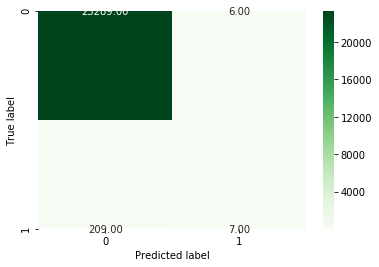

In [143]:
draw_cm(y_test, pred_test)

In [144]:
#Get predicted probabilites
target_probailities_log = logreg.predict_proba(X_test)[:,1]

In [145]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

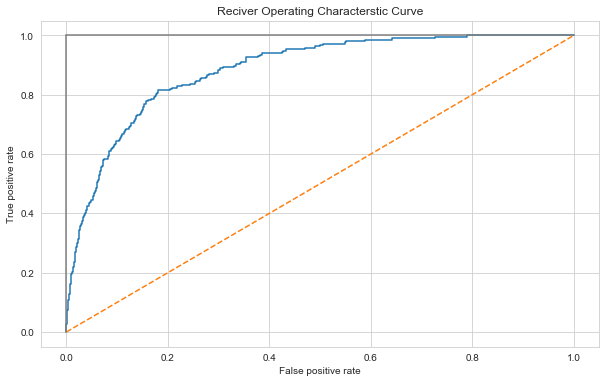

In [146]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [147]:
from sklearn.tree import DecisionTreeClassifier
#Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [148]:
X_train.shape,X_test.shape

((54858, 41), (23511, 41))

# Model1:- Criterion='gini

In [149]:
model_gini=DecisionTreeClassifier()

In [150]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
preds_gini = model_gini.predict(X_test)

In [152]:
pred_gini2 = model_gini.predict(X_train)

In [153]:
print(metrics.classification_report(y_train,pred_gini2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54359
           1       1.00      1.00      1.00       499

    accuracy                           1.00     54858
   macro avg       1.00      1.00      1.00     54858
weighted avg       1.00      1.00      1.00     54858



In [154]:
print(metrics.roc_auc_score(y_train,pred_gini2))

0.9989979959919839


In [155]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[23067   214]
 [  180    50]]


In [156]:
from sklearn.metrics import accuracy_score
print(model_gini.score(X_train,y_train))

0.9999817711181596


In [157]:
from sklearn.metrics import accuracy_score
print(model_gini.score(X_test,y_test))

0.9832418867764026


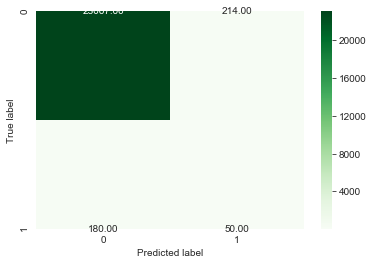

In [158]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_gini)

In [159]:
#Calculate accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
print(accuracy_score(y_test,preds_gini))
print(recall_score(y_test,preds_gini))

0.9832418867764026
0.21739130434782608


In [160]:
print(metrics.classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23281
           1       0.19      0.22      0.20       230

    accuracy                           0.98     23511
   macro avg       0.59      0.60      0.60     23511
weighted avg       0.98      0.98      0.98     23511



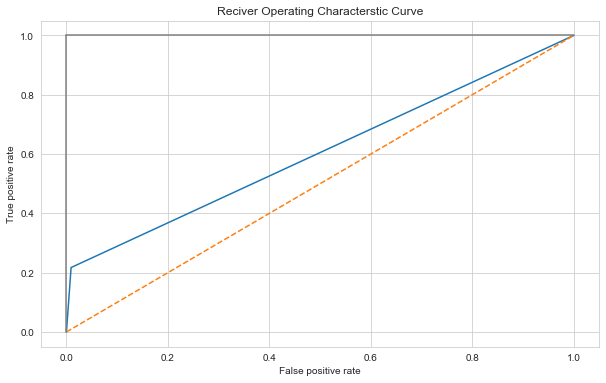

In [161]:
#Get predicted probabilites
target_probailities_log = model_gini.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_gini,tree_true_positive_gini,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_gini,tree_true_positive_gini)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [162]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_gini))

0.6040996296662888


In [163]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_gini))

0.6040996296662888


# Model2:- Criterion='Entropy'


In [164]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [165]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [166]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [167]:
from sklearn.metrics import accuracy_score
print(model_entropy.score(X_train,y_train))

0.9999817711181596


In [168]:
from sklearn.metrics import accuracy_score
print(model_entropy.score(X_test,y_test))

0.9837097528816299


In [169]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[23082   199]
 [  184    46]]


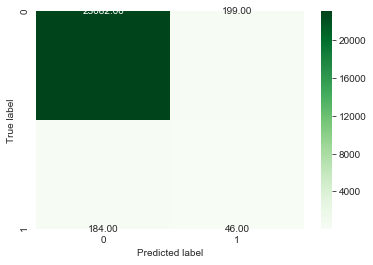

In [170]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_entropy)

In [171]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.9837097528816299
0.9999817711181596


In [172]:
print(metrics.classification_report(y_test,preds_entropy))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23281
           1       0.19      0.20      0.19       230

    accuracy                           0.98     23511
   macro avg       0.59      0.60      0.59     23511
weighted avg       0.98      0.98      0.98     23511



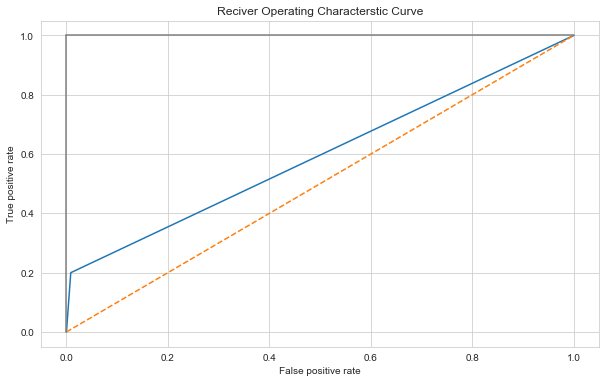

In [173]:
#Get predicted probabilites
target_probailities_log = model_entropy.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_entropy,tree_true_positive_entropy,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_entropy,tree_true_positive_entropy)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [174]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_entropy))

0.5957261286027232


In [175]:
print(roc_auc_score(y_train,preds_entropy_train))

0.9989979959919839


In [176]:
print(classification_report(y_train,preds_entropy_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54359
           1       1.00      1.00      1.00       499

    accuracy                           1.00     54858
   macro avg       1.00      1.00      1.00     54858
weighted avg       1.00      1.00      1.00     54858



# The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model.


In [177]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                              max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[23263    18]
 [  214    16]]


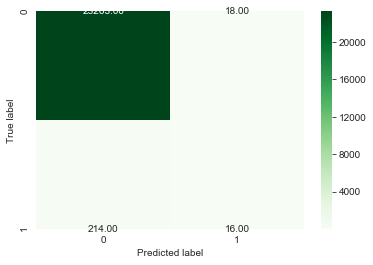

In [178]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_pruned)

In [179]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.9901322785079325
0.9909220168434868


In [180]:
print(metrics.classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23281
           1       0.47      0.07      0.12       230

    accuracy                           0.99     23511
   macro avg       0.73      0.53      0.56     23511
weighted avg       0.99      0.99      0.99     23511



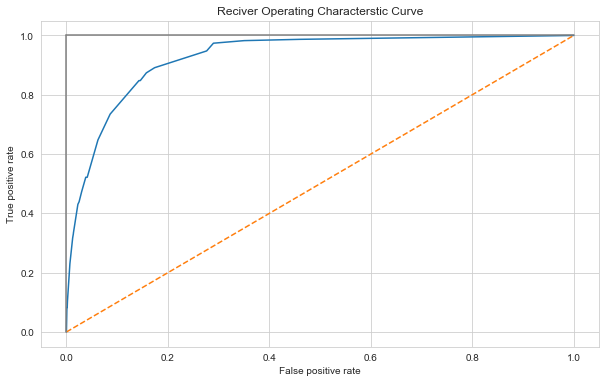

In [181]:
#Get predicted probabilites
target_probailities_log = clf_pruned.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_pruned,tree_true_positive_pruned,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [182]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_pruned))

0.5343960273632352


In [183]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,preds_pruned_train))

0.5357502104781686


In [184]:
from sklearn.metrics import roc_auc_score
print(classification_report(y_train,preds_pruned_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     54359
           1       0.51      0.07      0.13       499

    accuracy                           0.99     54858
   macro avg       0.75      0.54      0.56     54858
weighted avg       0.99      0.99      0.99     54858



In [185]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.02242393e-04 6.85192195e-04 0.00000000e+00
 0.00000000e+00 2.17207852e-05 1.95588444e-04 8.47649661e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.17332491e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.30830244e-04
 0.00000000e+00 6.32792718e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21551410e-05 5.21686811e-04
 5.79324093e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.17754116e-06 2.24350456e-05
 0.00000000e+00 2.25892245e-05 1.33242018e-05 4.68102089e-05
 8.10966248e-05]


In [186]:
train.columns

Index(['coupon_id', 'customer_id', 'brand', 'brand_type', 'category', 'cd_sum',
       'coupon-used_x', 'coupon_discount_x', 'item_counts', 'no_of_customers',
       'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'coupon-used_y', 'coupon_discount_y', 'day',
       'no_of_items', 'month', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'weekday', 'cdd_sum', 'customer_id_count', 'odd_sum',
       'qa_sum', 'pprice_sum'],
      dtype='object')

In [187]:
feature_cols = train.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(12)

,0
coupon-used_x,0.30
coupon-used_y,0.23
campaign_type,0.14
od_sum,0.09
cd_sum,0.04
other_discount_x,0.04
pprice_sum,0.04
selling_price_x,0.03
age_range,0.03
qa_sum,0.02


# RANDOM FOREST


In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [189]:
training_set, test_set, class_set, test_class_set = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [190]:
fit_rf = RandomForestClassifier(random_state=42)

In [191]:
fit_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [192]:
predictions = fit_rf.predict(X_test)

In [193]:
predictions_train = fit_rf.predict(X_train)

In [194]:
from sklearn.metrics import classification_report,confusion_matrix

In [195]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23281
           1       0.48      0.09      0.15       230

    accuracy                           0.99     23511
   macro avg       0.73      0.54      0.57     23511
weighted avg       0.99      0.99      0.99     23511



In [196]:
print(classification_report(y_train,predictions_train)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54359
           1       1.00      0.82      0.90       499

    accuracy                           1.00     54858
   macro avg       1.00      0.91      0.95     54858
weighted avg       1.00      1.00      1.00     54858



In [197]:
print(roc_auc_score(y_train,predictions_train)) 

0.9108124451777044


In [198]:
print(confusion_matrix(y_test,predictions))

[[23259    22]
 [  210    20]]


In [199]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9901322785079325


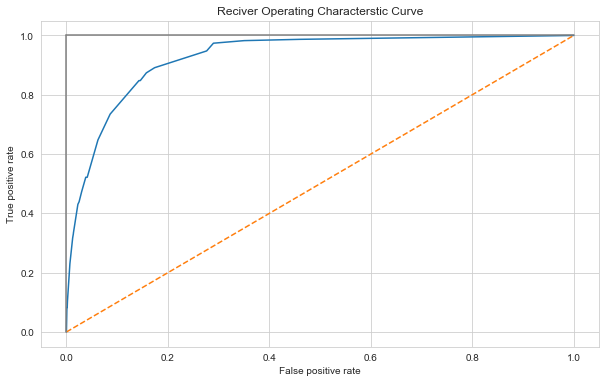

In [200]:
#Get predicted probabilites
target_probailities_log = clf_pruned.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_RF,tree_true_positive_RF,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_RF,tree_true_positive_RF)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [201]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.5430057725743889


In [202]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

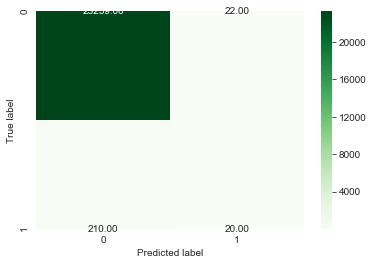

In [203]:
draw_cm(y_test, predictions)

In [204]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [205]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


# KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn = KNeighborsClassifier()

In [207]:
knn.fit(X_train, y_train)
train_pred_sm = knn.predict(X_train)
test_pred_sm = knn.predict(X_test)

In [208]:
Model.append('KNN_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))


In [209]:
print(accuracy_score(y_test,test_pred_sm))
print(accuracy_score(y_train,train_pred_sm))


0.9899621453787589
0.9909584746071676


In [210]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23281
           1       0.00      0.00      0.00       230

    accuracy                           0.99     23511
   macro avg       0.50      0.50      0.50     23511
weighted avg       0.98      0.99      0.99     23511



# Naive Bayes

In [211]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [212]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     23281
           1       0.08      0.33      0.13       230

    accuracy                           0.96     23511
   macro avg       0.54      0.65      0.56     23511
weighted avg       0.98      0.96      0.97     23511



In [213]:
roc_auc_score(y_test,y_pred_nb)

0.6453681206731372

In [214]:
Model.append('Naive Bayes')


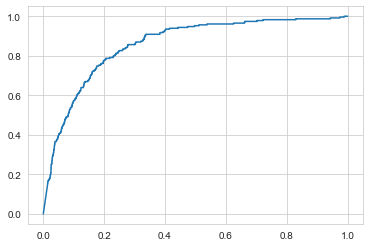

In [215]:
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(nb_fpr, nb_tpr, label='NB')

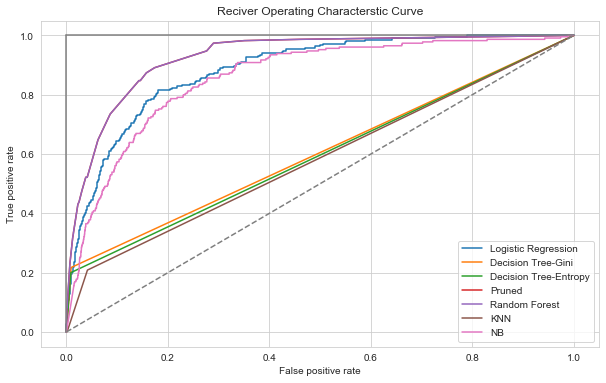

In [216]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_gini,tree_true_positive_gini,label='Decision Tree-Gini')
plt.plot(tree_false_positive_entropy,tree_true_positive_entropy,label='Decision Tree-Entropy')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned,label='Pruned')
plt.plot(tree_false_positive_RF,tree_true_positive_RF,label='Random Forest')
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(nb_fpr, nb_tpr, label='NB')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

-KNN overfits the model so the best MODEL upto here is RANDOM FOREST

# FOCUSING MAINLY ON FEATURE IMPORTANCE AND USING ADVANCE MODELS

In [217]:
train=pd.read_csv('train.csv')
coup_item=pd.read_csv('coupon_item_mapping.csv')
comp=pd.read_csv('campaign_data.csv')
tran=pd.read_csv('customer_transaction_data.csv')
demo=pd.read_csv('customer_demographics.csv')  
item=pd.read_csv('item_data.csv')
print(train.shape,coup_item.shape,comp.shape,tran.shape,demo.shape,item.shape)

(78369, 5) (92663, 2) (28, 4) (1324566, 7) (760, 7) (74066, 4)


In [218]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [219]:
print(train.shape)
train.redemption_status.value_counts()

(78369, 5)


0    77640
1      729
Name: redemption_status, dtype: int64

In [220]:
print(comp.shape)
comp.head()

(28, 4)


,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


# Campaign Data - Feat Engg


In [221]:
comp['start_date']=pd.to_datetime(comp['start_date'],format='%d/%m/%y',dayfirst=True)
comp['end_date']=pd.to_datetime(comp['end_date'],format='%d/%m/%y',dayfirst=True)

comp['diff_d']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'D')
comp['diff_m']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'M')
comp['diff_w']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'W')

# comp.drop(['start_date','end_date'],axis=1,inplace=True)

In [222]:
comp.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
campaign_id,28.00,NaN,NaN,NaN,NaT,NaT,15.57,9.12,1.00,7.75,16.50,23.25,30.00
campaign_type,28,2,Y,22,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,28,25,2013-04-22 00:00:00,2,2012-08-12,2013-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,28,26,2013-10-18 00:00:00,2,2012-09-21,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diff_d,28.00,NaN,NaN,NaN,NaT,NaT,41.86,11.96,32.00,32.00,35.50,49.25,70.00
diff_m,28.00,NaN,NaN,NaN,NaT,NaT,1.38,0.39,1.05,1.05,1.17,1.62,2.30
diff_w,28.00,NaN,NaN,NaN,NaT,NaT,5.98,1.71,4.57,4.57,5.07,7.04,10.00


In [223]:
train=train.merge(comp,on='campaign_id',how='left')
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.00,1.05,4.57
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.00,1.58,6.86


# Item Data and Coupon Item Mapping


In [224]:
for j in ['brand', 'brand_type', 'category']:
    print(j,item[j].nunique())

brand 5528
brand_type 2
category 19


In [225]:

for j in ['brand', 'brand_type', 'category']:
    item[j]=item[j].astype('category')
    
coup_item=coup_item.merge(item,on='item_id',how='left')

In [226]:
coup_item.coupon_id.nunique()

1116

In [227]:
coup_item.head(),coup_item.shape

(   coupon_id  item_id brand   brand_type category
 0        105       37    56        Local  Grocery
 1        107       75    56        Local  Grocery
 2        494       76   209  Established  Grocery
 3        522       77   278  Established  Grocery
 4        518       77   278  Established  Grocery, (92663, 5))

# Customer Transaction - Feat Engg


In [228]:
tran=pd.read_csv('customer_transaction_data.csv')
tran['date']=pd.to_datetime(tran['date'],format='%Y-%m-%d')
tran['date_d']=tran['date'].dt.day.astype('category')
tran['date_m']=tran['date'].dt.month.astype('category')
tran['date_w']=tran['date'].dt.week.astype('category')

# tran.drop('date',axis=1,inplace=True)
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,1,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.00,2,1,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.00,2,1,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.00,2,1,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.00,2,1,1


In [229]:
tran[tran['quantity']==20]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
2257,2012-01-11,632,36682,20,156.73,-21.37,0.00,11,1,2
30413,2012-02-22,1324,9561,20,626.91,-505.80,0.00,22,2,8
35980,2012-02-28,757,25460,20,118.61,-2.49,0.00,28,2,9
60726,2012-03-17,1239,18151,20,142.48,0.00,0.00,17,3,11
82841,2012-03-31,767,37397,20,277.84,0.00,0.00,31,3,13
...,...,...,...,...,...,...,...,...,...,...
1280892,2013-06-16,1483,20360,20,142.48,0.00,0.00,16,6,24
1281796,2013-06-17,811,5873,20,121.11,0.00,0.00,17,6,25
1285318,2013-06-18,132,20360,20,142.48,0.00,0.00,18,6,25
1309218,2013-06-28,362,72255,20,71.24,-35.62,0.00,28,6,26


In [230]:
tran['discount_bin']=tran['coupon_discount'].apply(lambda x: 0 if x>=0 else 1)
tran['marked_price']=tran['selling_price']-tran['other_discount']-tran['coupon_discount']
tran['disc_percent']=(tran['marked_price']-tran['selling_price'])/tran['selling_price']
tran['price_per_quan']=tran['marked_price']/tran['quantity']
tran['marked_by_sale']=tran['marked_price']/tran['selling_price']


In [231]:
tran=tran.merge(coup_item,on='item_id',how='left')
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,1,1,0,45.95,0.30,45.95,1.30,7.00,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,1,1,0,45.95,0.30,45.95,1.30,20.00,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,1,1,0,45.95,0.30,45.95,1.30,29.00,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.00,2,1,1,0,67.32,0.26,67.32,1.26,7.00,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.00,2,1,1,0,67.32,0.26,67.32,1.26,20.00,56,Local,Natural Products


In [232]:
print(tran.shape)
tran=tran[tran.duplicated()==False]
print(tran.shape,train.shape)
# --drop it

(2657495, 19)
(2650887, 19) (78369, 11)


In [233]:
tran=tran.merge(tran.groupby(['customer_id','date']).agg({'coupon_id':'count','item_id':'count','disc_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_aquired','item_id':'item_bought','disc_percent':'tot_disc'}),on=['customer_id','date'],how='left')

In [234]:
tran[(tran['customer_id']==1052) & (tran['coupon_id']==21)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,...,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc
184957,2012-04-05,1052,13774,1,35.62,-31.70,0.00,5,4,14,...,0.89,67.32,1.89,21.00,56,Local,Grocery,26,32,8.93
184966,2012-04-05,1052,30293,1,35.26,0.00,0.00,5,4,14,...,0.00,35.26,1.00,21.00,56,Local,Grocery,26,32,8.93
184970,2012-04-05,1052,5207,1,106.86,-21.02,0.00,5,4,14,...,0.20,127.88,1.20,21.00,681,Established,Grocery,26,32,8.93
184973,2012-04-05,1052,9571,1,106.86,-21.02,0.00,5,4,14,...,0.20,127.88,1.20,21.00,681,Established,Grocery,26,32,8.93
184978,2012-04-05,1052,47434,1,106.86,-21.02,0.00,5,4,14,...,0.20,127.88,1.20,21.00,681,Established,Grocery,26,32,8.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594456,2013-06-22,1052,27522,1,110.07,0.00,0.00,22,6,25,...,0.00,110.07,1.00,21.00,634,Established,Grocery,33,34,14.58
2594461,2013-06-22,1052,36578,1,17.81,-10.33,0.00,22,6,25,...,0.58,28.14,1.58,21.00,1337,Established,Grocery,33,34,14.58
2594464,2013-06-22,1052,47434,1,99.38,-28.50,0.00,22,6,25,...,0.29,127.88,1.29,21.00,681,Established,Grocery,33,34,14.58
2623916,2013-06-28,1052,5859,3,39.18,-30.99,-14.25,28,6,26,...,1.15,28.14,2.15,21.00,1337,Established,Grocery,24,30,10.21


In [235]:
tran['coupon_to_item']=tran['item_bought']-tran['coupon_aquired']
tran[(tran['customer_id']==413) & (tran['coupon_id']==577)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,...,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc,coupon_to_item
859832,2012-08-16,413,16887,1,110.07,0.00,0.00,16,8,33,...,110.07,1.00,577.00,408,Established,Pharmaceutical,13,22,2.39,9


In [236]:
def func(a,b,c):
    if c!=0:
        c=list(c)
        v=0
        for k in c:
            if a<=k and b>k:
                v+=1
        return v
    else:
        return 0

# Best Features


In [237]:
ddf=train.merge(tran.groupby(['customer_id','coupon_id']).agg({'date':set,'discount_bin':sum,'quantity':sum,'item_id':'count',
                                                            'coupon_aquired':sum,'item_bought':'mean','tot_disc':sum}).reset_index(),on=['customer_id','coupon_id'],how='left')
ddf.sample(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
23999,39352,13,22,298,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71,"{2013-01-05 00:00:00, 2012-09-18 00:00:00, 201...",0.00,44.00,34.00,462.00,14.18,166.09
59388,97579,8,60,584,0,X,2013-02-16,2013-04-05,48.00,1.58,6.86,NaN,nan,nan,nan,nan,nan,nan
879,1447,11,669,377,0,Y,2013-04-22,2013-06-07,46.00,1.51,6.57,{2012-11-06 00:00:00},0.00,1.00,1.00,44.00,61.00,8.37
60206,98908,8,761,1449,0,X,2013-02-16,2013-04-05,48.00,1.58,6.86,NaN,nan,nan,nan,nan,nan,nan
25616,42028,11,669,1469,0,Y,2013-04-22,2013-06-07,46.00,1.51,6.57,{2013-01-02 00:00:00},0.00,1.00,1.00,70.00,101.00,11.53
23551,38613,13,110,378,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71,NaN,nan,nan,nan,nan,nan,nan
53798,88400,13,157,613,0,X,2013-05-19,2013-07-05,47.00,1.54,6.71,"{2012-07-06 00:00:00, 2012-03-16 00:00:00}",0.00,2.00,2.00,27.00,17.50,5.36
51424,84407,8,12,135,0,X,2013-02-16,2013-04-05,48.00,1.58,6.86,NaN,nan,nan,nan,nan,nan,nan
12180,20109,12,1075,1043,0,Y,2013-04-22,2013-05-24,32.00,1.05,4.57,NaN,nan,nan,nan,nan,nan,nan
31571,51734,5,955,1216,0,Y,2013-01-12,2013-02-15,34.00,1.12,4.86,NaN,nan,nan,nan,nan,nan,nan


In [238]:
ddf['coupon_aquired'].fillna(0)

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
78364     0.00
78365     0.00
78366   138.00
78367     0.00
78368    23.00
Name: coupon_aquired, Length: 78369, dtype: float64

# Features tried but everyone gave 99CV and overfitted LB but only 'within_date' helped me improve
Single feature that boosted my score from 86.XX to 93.XX

In [239]:
print(ddf.shape)
ddf['date'].replace(np.nan,0,inplace=True)
ddf['discount_bin'].replace(np.nan,-1,inplace=True)


train['within_date']=ddf['date'].apply(lambda x: len(x) if x !=0 else 0)

(78369, 18)


In [240]:
c=['count','nunique']
n=['mean','max','min','sum','std']
nn=['mean','max','min','sum','std','quantile']
agg_c={'date_d':c,'date_m':c,'date_w':c,'quantity':n,'selling_price':n,'other_discount':n,'coupon_discount':n,'item_id':c,'brand':c,
       'category':c,'coupon_id':c,'discount_bin':nn,'marked_price':n,'disc_percent':n,'price_per_quan':n,'brand_type':c,'marked_by_sale':n,
       'coupon_aquired':nn, 'item_bought':nn, 'tot_disc':n, 'coupon_to_item':nn}
trans=tran.groupby(['customer_id']).agg(agg_c)
trans.head()

date_d         date_m         date_w         quantity             \
             count nunique  count nunique  count nunique     mean    max min   
customer_id                                                                    
1             2206      28   2206      12   2206      38     1.13      5   1   
2              823      19    823      11    823      27     1.12      5   1   
3             1351      23   1351      12   1351      30     6.86   6949   1   
4              451      23    451      11    451      21     1.28      5   1   
5             1594      31   1594      12   1594      51    59.35  14638   1   

                    ... tot_disc                     coupon_to_item          \
               sum  ...      max  min      sum   std           mean max min   
customer_id         ...                                                       
1             2501  ...    30.80 0.00 29544.40  6.80          13.28  23   0   
2              920  ...    16.84 0.00  6242.84  5.04           7.81  20   0   
3             9270  ...    46.13 0.00 22281.62 12.41          13.96  35   0   
4              579  ...    13.88 0.00  1927.09  4.16           6.37  13   0   
5            94597  ...    14.59 0.00  3806.96  3.23           2.47  11   0   

                                  
               sum  std quantile  
customer_id                       
1            29287 5.67    14.00  
2             6431 6.10     6.00  
3            18860 9.53    12.00  
4             2875 4.60     4.00  
5             3944 2.35     2.00  

[5 rows x 85 columns]

In [241]:
trans.columns=['F_' + '_'.join(col).strip() for col in trans.columns.values]
trans.reset_index(inplace=True)
trans.head()

,customer_id,F_date_d_count,F_date_d_nunique,F_date_m_count,F_date_m_nunique,F_date_w_count,F_date_w_nunique,F_quantity_mean,F_quantity_max,F_quantity_min,...,F_tot_disc_max,F_tot_disc_min,F_tot_disc_sum,F_tot_disc_std,F_coupon_to_item_mean,F_coupon_to_item_max,F_coupon_to_item_min,F_coupon_to_item_sum,F_coupon_to_item_std,F_coupon_to_item_quantile
0,1,2206,28,2206,12,2206,38,1.13,5,1,...,30.80,0.00,29544.40,6.80,13.28,23,0,29287,5.67,14.00
1,2,823,19,823,11,823,27,1.12,5,1,...,16.84,0.00,6242.84,5.04,7.81,20,0,6431,6.10,6.00
2,3,1351,23,1351,12,1351,30,6.86,6949,1,...,46.13,0.00,22281.62,12.41,13.96,35,0,18860,9.53,12.00
3,4,451,23,451,11,451,21,1.28,5,1,...,13.88,0.00,1927.09,4.16,6.37,13,0,2875,4.60,4.00
4,5,1594,31,1594,12,1594,51,59.35,14638,1,...,14.59,0.00,3806.96,3.23,2.47,11,0,3944,2.35,2.00


In [242]:
train=train.merge(trans,on=['customer_id'],how='left')
train['campaign_type']=train['campaign_type'].factorize()[0]

In [243]:
df_train=train[train['redemption_status'].isnull()==False].copy()
df_test=train[train['redemption_status'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(78369, 97) (0, 97)


In [244]:
df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('campaign_id').mean().reset_index(),on='campaign_id',how='left')

,id,campaign_id,coupon_id_x,customer_id_x,redemption_status,campaign_type_x,start_date,end_date,diff_d_x,diff_m_x,...,F_tot_disc_max_y,F_tot_disc_min_y,F_tot_disc_sum_y,F_tot_disc_std_y,F_coupon_to_item_mean_y,F_coupon_to_item_max_y,F_coupon_to_item_min_y,F_coupon_to_item_sum_y,F_coupon_to_item_std_y,F_coupon_to_item_quantile_y
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,47.00,1.54,...,33.55,0.00,22777.59,8.32,7.64,21.50,0.02,17797.57,5.57,6.51
1,2,13,116,48,0,0,2013-05-19,2013-07-05,47.00,1.54,...,33.55,0.00,22777.59,8.32,7.64,21.50,0.02,17797.57,5.57,6.51
2,6,9,635,205,0,1,2013-03-11,2013-04-12,32.00,1.05,...,33.36,0.01,23196.83,8.58,7.26,19.76,0.03,16053.55,5.02,6.28
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,47.00,1.54,...,33.55,0.00,22777.59,8.32,7.64,21.50,0.02,17797.57,5.57,6.51
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,48.00,1.58,...,32.01,0.00,21276.40,8.12,7.58,20.88,0.02,16666.73,5.47,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,128587,8,71,1523,0,0,2013-02-16,2013-04-05,48.00,1.58,...,32.01,0.00,21276.40,8.12,7.58,20.88,0.02,16666.73,5.47,6.56
78365,128589,30,547,937,0,0,2012-11-19,2013-01-04,46.00,1.51,...,35.78,0.00,24342.70,8.92,7.58,20.79,0.02,17979.40,5.51,6.45
78366,128590,8,754,1004,0,0,2013-02-16,2013-04-05,48.00,1.58,...,32.01,0.00,21276.40,8.12,7.58,20.88,0.02,16666.73,5.47,6.56
78367,128592,13,134,71,0,0,2013-05-19,2013-07-05,47.00,1.54,...,33.55,0.00,22777.59,8.32,7.64,21.50,0.02,17797.57,5.57,6.51


In [245]:
df_train=df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')
df_test=df_test.merge(df_test.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')

# df_train=df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('coupon_id_x').mean().reset_index(),on='coupon_id_x',how='left')
# df_test=df_test.merge(df_test.drop(['id','redemption_status'],axis=1).groupby('coupon_id_x').mean().reset_index(),on='coupon_id_x',how='left')



# df_train=new_df(df_train)
# print(df_train.shape)

# df_train.head()

In [246]:
df_train[df_train.redemption_status==1]

,id,campaign_id_x,coupon_id,customer_id_x,redemption_status,campaign_type_x,start_date,end_date,diff_d_x,diff_m_x,...,F_tot_disc_max_y,F_tot_disc_min_y,F_tot_disc_sum_y,F_tot_disc_std_y,F_coupon_to_item_mean_y,F_coupon_to_item_max_y,F_coupon_to_item_min_y,F_coupon_to_item_sum_y,F_coupon_to_item_std_y,F_coupon_to_item_quantile_y
44,72,13,413,276,1,0,2013-05-19,2013-07-05,47.00,1.54,...,33.99,0.00,26329.67,8.59,8.43,22.89,0.04,21165.84,5.95,7.23
181,299,13,960,467,1,0,2013-05-19,2013-07-05,47.00,1.54,...,41.55,0.00,24843.99,10.05,7.76,22.82,0.02,17768.97,5.96,6.35
217,359,26,797,214,1,0,2012-08-12,2012-09-21,40.00,1.31,...,43.64,0.00,39157.85,10.15,8.26,22.10,0.00,25078.55,5.61,7.42
237,387,13,754,1103,1,0,2013-05-19,2013-07-05,47.00,1.54,...,36.05,0.01,25913.44,8.90,7.77,22.08,0.02,19612.45,5.68,6.63
607,998,13,21,1457,1,0,2013-05-19,2013-07-05,47.00,1.54,...,37.19,0.00,24724.59,9.16,7.73,21.62,0.02,18004.73,5.57,6.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77617,127381,13,982,1408,1,0,2013-05-19,2013-07-05,47.00,1.54,...,31.57,0.00,22105.53,7.83,7.36,19.93,0.04,16883.26,5.07,6.41
77729,127565,13,885,781,1,0,2013-05-19,2013-07-05,47.00,1.54,...,30.38,0.00,20081.39,7.71,7.62,20.98,0.02,17294.41,5.38,6.82
77830,127701,13,726,407,1,0,2013-05-19,2013-07-05,47.00,1.54,...,32.87,0.01,26021.57,8.50,7.74,21.41,0.02,18749.95,5.63,6.59
78060,128076,9,705,999,1,1,2013-03-11,2013-04-12,32.00,1.05,...,34.18,0.01,25406.92,8.65,8.00,21.82,0.03,19098.74,5.63,6.96


In [247]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [248]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [249]:
df_train.columns

Index(['id', 'campaign_id_x', 'coupon_id', 'customer_id_x',
       'redemption_status', 'campaign_type_x', 'start_date', 'end_date',
       'diff_d_x', 'diff_m_x',
       ...
       'F_tot_disc_max_y', 'F_tot_disc_min_y', 'F_tot_disc_sum_y',
       'F_tot_disc_std_y', 'F_coupon_to_item_mean_y', 'F_coupon_to_item_max_y',
       'F_coupon_to_item_min_y', 'F_coupon_to_item_sum_y',
       'F_coupon_to_item_std_y', 'F_coupon_to_item_quantile_y'],
      dtype='object', length=189)

In [250]:
col_to_drop=['id','redemption_status','start_date','end_date']

X,y=df_train.drop(col_to_drop,axis=1),df_train['redemption_status']
Xtest=df_test.drop(col_to_drop,axis=1)

In [251]:
print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994,stratify=y)

(78369, 185) (0, 185)


In [252]:
col=['campaign_id', 'coupon_id', 'customer_id', 'campaign_type','within_date', 'within_date_discount']

# LGBM


In [253]:
m=LGBMClassifier(n_estimators=1500,random_state=1994,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5,bagging_fraction=0.9)
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)],eval_metric='auc', early_stopping_rounds=100,verbose=200)
p=m.predict_proba(X_val)[:,-1]

print(roc_auc_score(y_val,p))

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.999972	training's binary_logloss: 0.00636907	valid_1's auc: 0.987194	valid_1's binary_logloss: 0.0224831
Early stopping, best iteration is:
[213]	training's auc: 0.999979	training's binary_logloss: 0.00602207	valid_1's auc: 0.987426	valid_1's binary_logloss: 0.0224444
0.9874258667212447


In [254]:
m.feature_importances_

array([ 51, 184,  71,  25,  45,  21,  11, 328,  35,  22,   5,   0,   2,
        36,  62,  32,   0,  38,  33,  31,  58,  30,  38,  46,  53,   0,
        71,  70,  71,  52,   0,  92,  85,  73,   6,  52,  28,  27,  21,
        13,   1, 100, 142,   1,   0, 127,  67,   0,  43,  62,  32,  25,
        49,  65,  63,   0,  36,  65,  82,  55,  72,  33,  42,   0,   0,
        14,  30,   0,  31,  35,  36,  47,   0,  22,  29,  46,  30,  42,
         0,  21,  44,  45,  40,  49,   4,  17,  40,  57,  31,   2,  57,
        61,  38,  12,  53,  16,  30,  13,   3, 217,  14,  31,   3,  28,
         3,  35,  41,  45,   0,  26,  63,  32,  31,  23,  29,  28,  36,
         0,  46,  19,  41,  25,   0,  36,  34,  29,   1,  17,  15,  15,
         3,  34,   2,  15,  57,  36,   0,  20,  46,   0,  27,  29,  27,
        15,  41,  37,  46,   0,  14,  59,  33,  56,  25,  11,  41,   0,
         0,  19,  17,   0,  12,  23,  20,  20,  26,  20,  32,  33,  20,
        17,  45,  19,  30,  20,  26,  20,  59,  17,  16,  33,  2

In [255]:
confusion_matrix(y_val,p>0.5)

array([[23257,    35],
       [  156,    63]], dtype=int64)

In [256]:
sorted(zip(m.feature_importances_,X_train),reverse=True)

[(328, 'within_date_x'),
 (217, 'within_date_y'),
 (184, 'coupon_id'),
 (142, 'F_discount_bin_mean_x'),
 (127, 'F_discount_bin_sum_x'),
 (100, 'F_coupon_id_nunique_x'),
 (92, 'F_coupon_discount_min_x'),
 (85, 'F_coupon_discount_sum_x'),
 (82, 'F_price_per_quan_mean_x'),
 (73, 'F_coupon_discount_std_x'),
 (72, 'F_price_per_quan_min_x'),
 (71, 'customer_id_x'),
 (71, 'F_other_discount_std_x'),
 (71, 'F_other_discount_min_x'),
 (70, 'F_other_discount_sum_x'),
 (67, 'F_discount_bin_std_x'),
 (65, 'F_disc_percent_std_x'),
 (65, 'F_disc_percent_mean_x'),
 (63, 'F_quantity_std_y'),
 (63, 'F_disc_percent_max_x'),
 (62, 'F_quantity_mean_x'),
 (62, 'F_marked_price_max_x'),
 (61, 'F_coupon_to_item_std_x'),
 (59, 'F_tot_disc_min_y'),
 (59, 'F_disc_percent_std_y'),
 (58, 'F_selling_price_max_x'),
 (57, 'F_discount_bin_mean_y'),
 (57, 'F_coupon_to_item_sum_x'),
 (57, 'F_coupon_to_item_mean_x'),
 (56, 'F_price_per_quan_max_y'),
 (55, 'F_price_per_quan_max_x'),
 (53, 'customer_id_y'),
 (53, 'F_other_d

# StratifiedKFold LGBM + Feature Selection


In [257]:
err=[]
y_pred_tot=[]

feature_importance_df = pd.DataFrame()

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X_train.columns
    fold_importance_df["importance"] = m.feature_importances_
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999884	training's binary_logloss: 0.00750694	valid_1's auc: 0.988641	valid_1's binary_logloss: 0.0228227
Early stopping, best iteration is:
[176]	training's auc: 0.999824	training's binary_logloss: 0.00820007	valid_1's auc: 0.98856	valid_1's binary_logloss: 0.0227544
err:  0.9885597735950259
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999877	training's binary_logloss: 0.00749019	valid_1's auc: 0.984975	valid_1's binary_logloss: 0.024031
Early stopping, best iteration is:
[178]	training's auc: 0.999817	training's binary_logloss: 0.00813159	valid_1's auc: 0.984953	valid_1's binary_logloss: 0.0239504
err:  0.984953385135469
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999904	training's binary_logloss: 0.00739328	valid_1's auc: 0.985527	valid_1's binary_logloss: 0.0240003
Early stopping, best iteration is:
[187]	training's 

In [258]:
np.mean(err,0)

0.987502636764774

# Feature Selection & Importance


In [259]:
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:150]['feature'])
all_features[0:150]

,feature,importance
0,within_date_x,284.20
1,within_date_y,201.20
2,coupon_id,182.30
3,F_discount_bin_sum_x,132.50
4,F_discount_bin_mean_x,127.50
...,...,...
145,F_brand_count_y,11.70
146,F_brand_nunique_y,11.30
147,F_date_d_count_y,9.90
148,diff_m_y,9.70


# Removing Most Correlated Features

In [260]:
df1 = X[important_features]
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if any(upper[column] > 0.98)]
print(len(high_cor))
print(high_cor)

33
['F_coupon_aquired_std_x', 'F_marked_by_sale_max_x', 'F_coupon_aquired_quantile_x', 'F_item_bought_mean_x', 'F_item_bought_max_x', 'F_marked_price_sum_x', 'F_price_per_quan_sum_x', 'F_marked_by_sale_std_x', 'F_date_d_count_x', 'F_brand_count_x', 'F_marked_by_sale_mean_x', 'F_marked_by_sale_std_y', 'F_item_bought_quantile_y', 'F_coupon_to_item_sum_y', 'F_coupon_aquired_sum_x', 'F_item_bought_sum_y', 'diff_m_x', 'F_disc_percent_sum_y', 'F_marked_by_sale_max_y', 'F_coupon_aquired_std_y', 'F_marked_by_sale_mean_y', 'F_marked_by_sale_sum_x', 'F_item_id_nunique_y', 'F_price_per_quan_sum_y', 'F_marked_price_sum_y', 'F_item_bought_max_y', 'F_item_bought_mean_y', 'F_category_count_x', 'F_brand_count_y', 'F_brand_nunique_y', 'F_date_d_count_y', 'diff_m_y', 'F_marked_by_sale_sum_y']


In [261]:
features = [i for i in important_features if i not in high_cor]
print(len(features))
print(features)

117
['within_date_x', 'within_date_y', 'coupon_id', 'F_discount_bin_sum_x', 'F_discount_bin_mean_x', 'F_price_per_quan_mean_x', 'F_coupon_discount_sum_x', 'F_coupon_discount_std_x', 'customer_id_x', 'F_coupon_id_nunique_x', 'F_other_discount_std_x', 'F_disc_percent_max_x', 'F_price_per_quan_min_x', 'F_discount_bin_std_x', 'F_coupon_discount_min_x', 'F_other_discount_min_x', 'F_price_per_quan_max_x', 'F_marked_price_std_x', 'F_disc_percent_std_x', 'F_selling_price_max_x', 'F_disc_percent_mean_x', 'F_coupon_discount_mean_x', 'F_tot_disc_std_x', 'F_marked_price_max_x', 'F_price_per_quan_max_y', 'F_price_per_quan_std_y', 'F_selling_price_mean_x', 'F_quantity_std_y', 'F_discount_bin_mean_y', 'F_other_discount_min_y', 'F_marked_price_min_x', 'F_tot_disc_max_x', 'F_item_bought_quantile_x', 'F_coupon_to_item_std_x', 'F_quantity_sum_x', 'F_quantity_max_x', 'F_other_discount_mean_x', 'F_price_per_quan_std_x', 'F_disc_percent_max_y', 'campaign_id_x', 'F_item_bought_min_y', 'F_price_per_quan_mean_

In [262]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999884	training's binary_logloss: 0.00750694	valid_1's auc: 0.988641	valid_1's binary_logloss: 0.0228227
Early stopping, best iteration is:
[176]	training's auc: 0.999824	training's binary_logloss: 0.00820007	valid_1's auc: 0.98856	valid_1's binary_logloss: 0.0227544
err:  0.9885597735950259
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999877	training's binary_logloss: 0.00749019	valid_1's auc: 0.984975	valid_1's binary_logloss: 0.024031
Early stopping, best iteration is:
[178]	training's auc: 0.999817	training's binary_logloss: 0.00813159	valid_1's auc: 0.984953	valid_1's binary_logloss: 0.0239504
err:  0.984953385135469
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.999904	training's binary_logloss: 0.00739328	valid_1's auc: 0.985527	valid_1's binary_logloss: 0.0240003
Early stopping, best iteration is:
[187]	training's 

In [263]:
np.mean(err,0)

0.987502636764774

-My prrocessor took a lot of time in xgboost but i have verified it

In [ ]:
train['campaign_type'] = train['campaign_type'].factorize()[0]